# Theory of AI Performance Gap

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import latex
import seaborn as sns

In [17]:
# default parameters used throughout our theoretical analysis

# flop_year_zero = 1e19

dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop


In [18]:

#kaplan version
# C0 = 1e8
# alpha = -0.05
# chin_func = lambda c: 1.69+(c/C0)**(alpha)


#chinchilla version 
chin_func = lambda c: 1070*c**(-0.154)+1.7
total_loss = lambda base_flop, time: chin_func(
    (alg_gains**time)*base_flop*(hardware_gains**time)
)
#make lambda function into regular function
def loss_full_function(init_compute, time, alg_gains=alg_gains_train, hardware_gains=hardware_gains, investment_growth=1):
    return chin_func(
        (alg_gains**time)*init_compute*(investment_growth**time)* (hardware_gains**time)
    )


Peak overhang occurs at 3.4 years


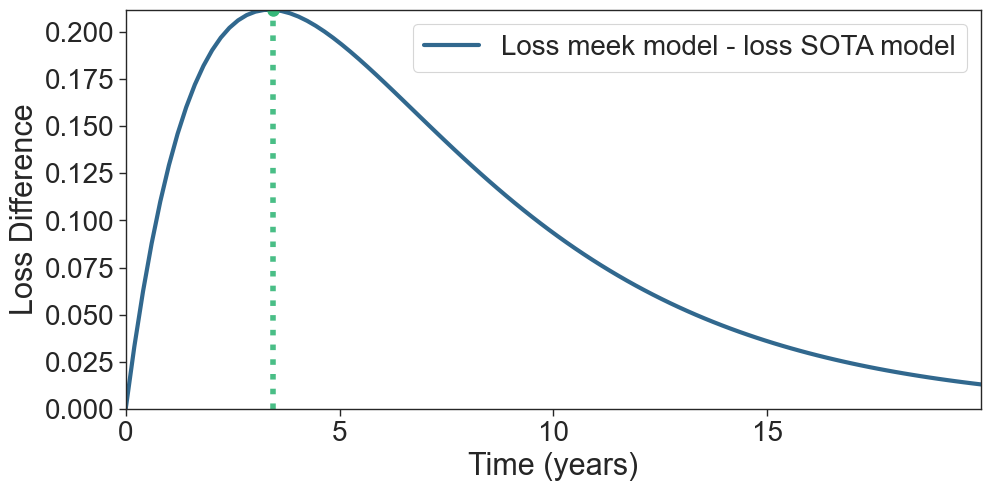

In [19]:
# Plot of overhang over time

dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop


sns.set_style("ticks")
sns.set_context("paper")

time = np.linspace(0, 20, 100)
f = plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", n_colors=2)
# gs = f.add_gridspec(5, 5)
top_model_loss = total_loss(flop_year_zero * (sota_compute_growth) ** time, time)
basic_model_loss = total_loss(flop_year_zero, time)

# Calculate loss difference and find maximum point
loss_diff = basic_model_loss - top_model_loss
max_idx = np.argmax(loss_diff)
max_time = time[max_idx]
max_loss_diff = loss_diff[max_idx]
# plt.rcParams['font.family'] = 'DejaVu Sans'
sns.lineplot(x=time, y=loss_diff, label="Loss meek model - loss SOTA model", linewidth=3,color=colors[0])

# Add vertical line at maximum point
plt.axvline(x=max_time, color=colors[1], linestyle=':', alpha=0.9, linewidth=4)
plt.plot(max_time, max_loss_diff, 'o', color=colors[1], markersize=8)  # Add orange dot at peak
# plt.annotate('peak overhang', xy=(max_time, max_loss_diff), xytext=(max_time-1, max_loss_diff-0.55), 
#             fontsize=20)
# add description 
print(f"Peak overhang occurs at {max_time:.1f} years")
# plt.title("AI Model Training Inequality Over Time",fontweight='bold', fontsize=15)
plt.xlabel("Time (years)", fontsize=22)
# plt.legend(fontsize=14, loc='lower right')
plt.ylabel("Loss Difference", fontsize=22)
#adjust font sizes
plt.xticks(np.arange(0, 20, 5),fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20}, loc='upper right')
#adjust label sizes
plt.margins(0,0)
plt.tight_layout()

plt.savefig("Figures/overhang.png")

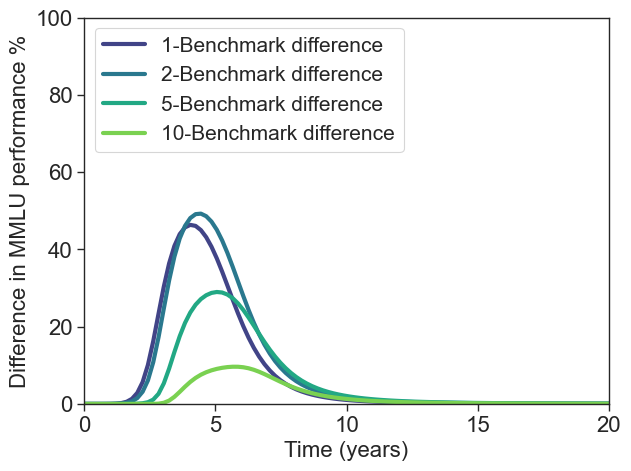

In [20]:
dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop



# Benchmark Performance of the Model 
# L = 0.5566859825577314
# x0 = 1.9739480423345785
# k = -23.774928114776312
# b = 0.2540434458699578
plt.figure(figsize=(6.4, 4.8))
consecutive_tasks = 5
small_p = 2

colors = sns.color_palette("viridis", n_colors=4)
def loss_to_benchmark(x, k=-23.77, x0=1.97, L=0.55, b=0.25):
    return L/(1 + np.exp(-k*(x-x0))) + b
    # return 1/(1+np.exp(1*(x-1.97)))
sns.set_style("ticks")
sns.set_context("paper")



time = np.linspace(0, 20, 100)
y1 = loss_to_benchmark(total_loss(flop_year_zero * (sota_compute_growth) ** time, time))
y2 = loss_to_benchmark(total_loss(flop_year_zero, time))
y4 = y2-y1
y3 = y2**consecutive_tasks-y1**consecutive_tasks
y5 = y2**small_p-y1**small_p
y10 = y2**10-y1**10
# plt.plot(x, y1, label='sigmoid(x)')
# plt.plot(x, y2, label='sigmoid(2*x)')
# plt.rcParams['font.family'] = 'DejaVu Sans'
plt.xticks(np.arange(0, 21, 5), fontsize=16)
plt.plot(time, -y4*100, label='1-Benchmark difference', linewidth=3, color=colors[0])
plt.plot(time, -y5*100, label=f'{small_p}-Benchmark difference', linewidth=3, color=colors[1])
plt.plot(time, -y3*100, label=f'{consecutive_tasks}-Benchmark difference', linewidth=3, color=colors[2])
plt.plot(time, -y10*100, label=f'10-Benchmark difference', linewidth=3, color=colors[3])
# plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=12)
plt.legend(loc='upper left', fontsize=15)

plt.yticks(fontsize=16)
plt.xscale('linear')
plt.xlabel("Time (years)", fontsize=16)
plt.ylabel("Difference in MMLU performance %", fontsize=16)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 21, 5), fontsize=16)
# plt.grid(True)
plt.margins(0,0)
plt.tight_layout()

plt.savefig("Figures/benchmark_performance.png")


# fig = plt.gcf()                    # get the current Figure
# print(fig.get_size_inches())       # prints [width, height] in inches

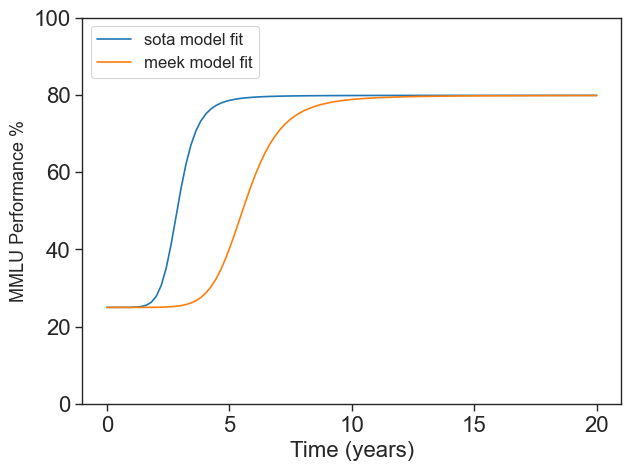

In [21]:

consecutive_tasks = 5
small_p = 2
sns.set_style("ticks")
sns.set_context("paper")



time = np.linspace(0, 20, 100)
y1 = loss_to_benchmark(total_loss(flop_year_zero * (sota_compute_growth) ** time, time))
y2 = loss_to_benchmark(total_loss(flop_year_zero, time))
plt.plot(time, y1*100, label='sota model fit')
plt.plot(time, y2*100, label='meek model fit')
# plt.plot(x, y1, label='sigmoid(x)')
# plt.plot(x, y2, label='sigmoid(2*x)')

# plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=12)
plt.legend(loc='upper left', fontsize=12)

plt.yticks(fontsize=16)
plt.xscale('linear')
plt.xlabel("Time (years)", fontsize=16)
plt.ylabel("MMLU Performance %", fontsize=13)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 21, 5), fontsize=16)
# plt.grid(True)
plt.tight_layout()
plt.savefig("Figures/logistic_loss_comparison.png")

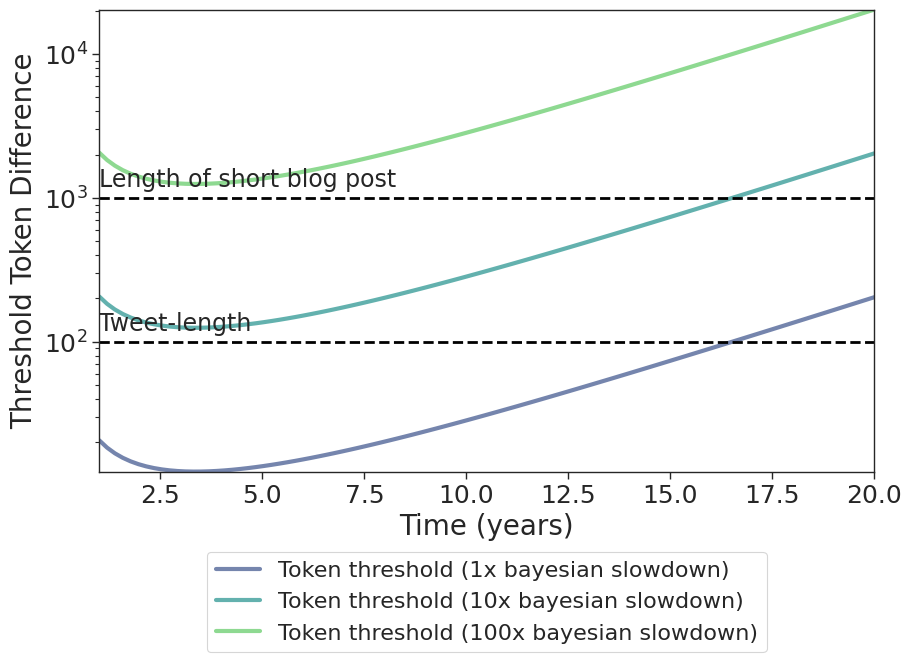

In [22]:
# now look at upper and lower bounds based on TV divergence 
# epsilon = 1e-2 # lower bound on error of hypothesis testing
dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop

slowdowns = [1, 10, 100]
colors = sns.color_palette("viridis", n_colors=3)
D1 = lambda time: loss_full_function(flop_year_zero, time, investment_growth=1)-1.7
D2 = lambda time: loss_full_function(flop_year_zero, time, investment_growth=sota_compute_growth)-1.7
# upper_bound = lambda time, slowdown: slowdown*2*(1-epsilon)**2*((D1(time)/2)-(D2(time)/2))**-1
upper_bound = lambda time, slowdown: slowdown*2.65*((D1(time)-D2(time))**-1)

x = np.linspace(1, 20, 100)
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'
for i, slowdown in enumerate(slowdowns):
    y_upper = upper_bound(x, slowdown)
    plt.plot(x, y_upper, label=f"Token threshold ({slowdown}x bayesian slowdown)", linewidth=3, alpha=0.7, color=colors[i])

plt.axhline(y=1e3, color='black', linestyle='--', linewidth=2)
plt.text(1, 1.2e3, 'Length of short blog post', fontsize=17)

plt.axhline(y=1e2, color='black', linestyle='--', linewidth=2)
plt.text(1, 1.2e2, 'Tweet-length', fontsize=17)

plt.xlabel("Time (years)", fontsize=20)
plt.ylabel("Threshold Token Difference", fontsize=20)
# plt.grid(True)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, bbox_to_anchor=(0.5, -0.15), loc='upper center')
# plt.title("Number of Tokens Necessary to Distinguish Models for Various Slowdowns", fontsize=14, fontweight='bold')
plt.yscale('log')
plt.margins(0,0)
plt.savefig("Figures/growth_token_distinction_boundary.png", bbox_inches='tight')


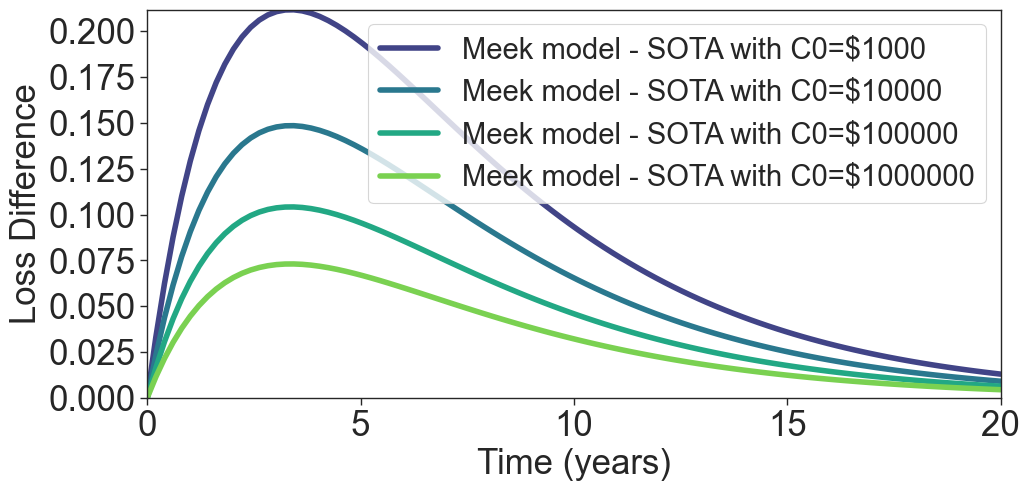

In [23]:
#part of robustness analysis look at different starting captial scenarios
dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop

sns.set_style("ticks")
sns.set_context("paper")
# Plot of overhang over time
time = np.linspace(0, 20, 100)
colors = sns.color_palette("viridis", n_colors=4)
# i want them all to be on the same graph
plt.figure(figsize=(10, 5))
for i, start_capital in enumerate([1000, 10000, 100000, 1000000]):
    # sota_compute_growth = 5 # model compute is growing at 5 times a year 
    # player2_growth = 1.1
    sota_loss = total_loss(start_capital*dollar_to_flop * (sota_compute_growth) ** time, time)
    basic_model_loss = total_loss(start_capital*dollar_to_flop, time)
    plt.plot(
        time,  basic_model_loss-sota_loss, label=f"Meek model - SOTA with C0=${start_capital}", linewidth=4, color=colors[i])
# add description 
#adjust font sizes
plt.xticks(np.arange(0, 21, 5),fontsize=25)
plt.yticks(fontsize=25)
# plt.legend(prop={'size': 14})
# add description to plot
# plt.title("Variation of Initial Top Model Investment", fontsize=14)
plt.xlabel("Time (years)",fontsize=25)
plt.legend(fontsize=21)
plt.ylabel("Loss Difference",fontsize=25)
# plt.grid(True)
#save image to paper images
# extended_colors
plt.tight_layout()
plt.margins(0,0)
plt.savefig("Figures/variation_initial_investment.png")
plt.show()


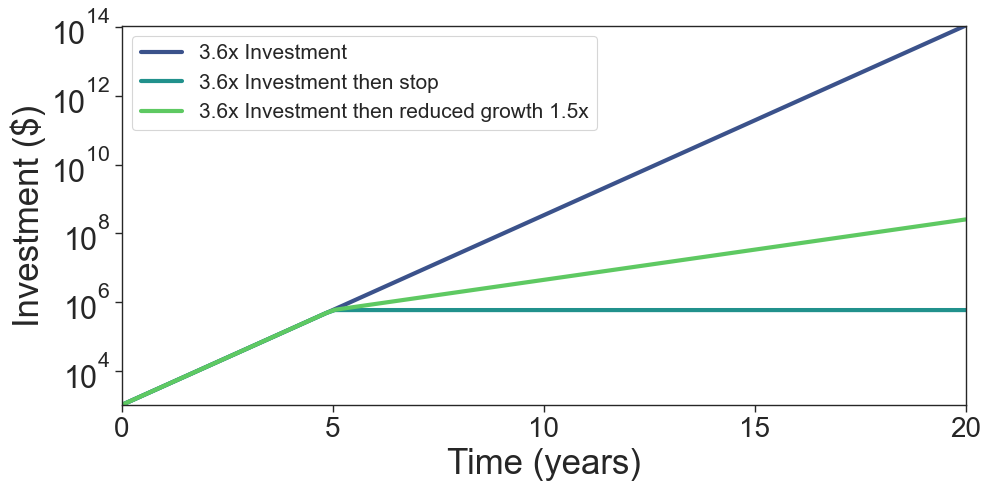

In [24]:

#part of robustness analysis look at different starting captial scenarios
dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop





# look at different investment curves over time for top model 
#ie regular exponential 
#logistic
#exponential then stop 
#exponential then reduced exponential growth
sns.set_style("ticks")
sns.set_context("paper")
colors = sns.color_palette("viridis", n_colors=3)
time = np.linspace(0, 20, 100)
plt.figure(figsize=(10, 5))

# logistic_investment = lambda time: 1000 + 1e10/ (1 + 1e11*np.exp(-np.log(5)* (time+5)))
# exponential_investment = lambda time: 1000.0 * (sota_compute_growth) ** time
# exponential_stop_investment = lambda time: 1000.0 * (sota_compute_growth) ** time if time < 5 else 1000.0 * (5) ** 5
#map exponential investment onto time array
# exponential_stop_investment = list(map(exponential_stop_investment, time))
stop_time = 5
# exponential_stop_investment = np.where(time <= stop_time, 1000.0 * (sota_compute_growth) ** time, 1000.0 * (5) ** stop_time)
stop_value = 1000.0 * (sota_compute_growth) ** stop_time  # Calculate the value at stop time
exponential_stop_investment = np.where(time <= stop_time, 
                                     1000.0 * (sota_compute_growth) ** time,  # Before stop
                                     stop_value)  # After stop - use constant value

exponential_reduce_investment = lambda time: start_capital * (sota_compute_growth) ** time if time < stop_time else start_capital * (sota_compute_growth) ** stop_time * (1.5) ** (time-stop_time)
exponential_reduce_investment = list(map(exponential_reduce_investment, time))
exponential_investment = start_capital * (sota_compute_growth) ** time
#map exponential reduce investment onto time array

# plt.plot(time, logistic_investment(time), label="Logistic Investment")
plt.plot(time, exponential_investment, label="3.6x Investment", linewidth=3, color=colors[0])
plt.plot(time, exponential_stop_investment, label="3.6x Investment then stop", linewidth=3, color=colors[1])
plt.plot(time, exponential_reduce_investment, label="3.6x Investment then reduced growth 1.5x", linewidth=3, color=colors[2])
plt.yscale("log")
# plt.grid(True)
plt.legend(fontsize=15)
plt.xticks(np.arange(0, 21, 5),fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel("Time (years)", fontsize=25)
plt.ylabel("Investment ($)", fontsize=25)
# plt.title("Investment Schedules", fontsize=20)
plt.margins(0,0)
plt.tight_layout()
plt.savefig("Figures/variation_investment_curves.png")
plt.show()

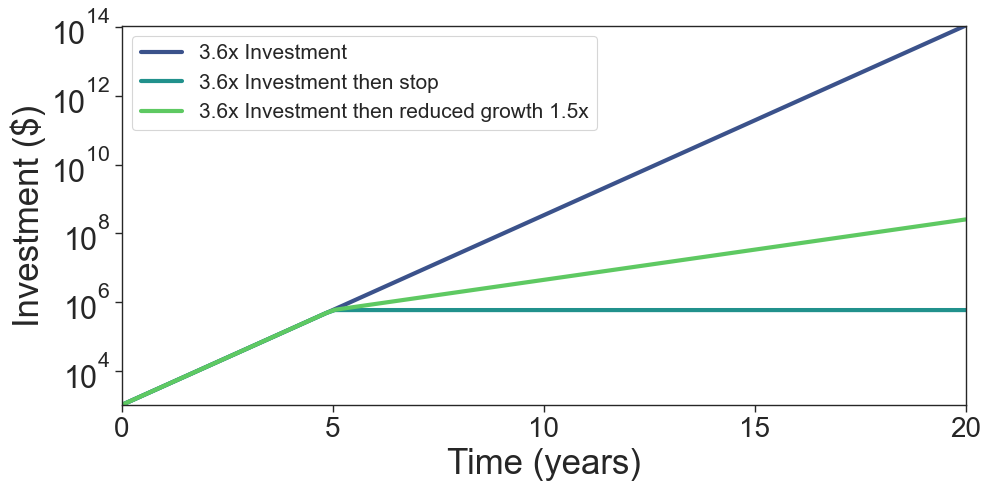

In [25]:
#part of robustness analysis look at different starting captial scenarios
dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop




# look at different investment curves over time for top model 
#ie regular exponential 
#logistic
#exponential then stop 
#exponential then reduced exponential growth
sns.set_style("ticks")
sns.set_context("paper")
colors = sns.color_palette("viridis", n_colors=3)
time = np.linspace(0, 20, 100)
plt.figure(figsize=(10, 5))

# logistic_investment = lambda time: 1000 + 1e10/ (1 + 1e11*np.exp(-np.log(5)* (time+5)))
# exponential_investment = lambda time: 1000.0 * (sota_compute_growth) ** time
# exponential_stop_investment = lambda time: 1000.0 * (sota_compute_growth) ** time if time < 5 else 1000.0 * (5) ** 5
#map exponential investment onto time array
# exponential_stop_investment = list(map(exponential_stop_investment, time))
stop_time = 5
# exponential_stop_investment = np.where(time <= stop_time, 1000.0 * (sota_compute_growth) ** time, 1000.0 * (5) ** stop_time)
stop_value = 1000.0 * (sota_compute_growth) ** stop_time  # Calculate the value at stop time
exponential_stop_investment = np.where(time <= stop_time, 
                                     1000.0 * (sota_compute_growth) ** time,  # Before stop
                                     stop_value)  # After stop - use constant value

exponential_reduce_investment = lambda time: 1000.0 * (sota_compute_growth) ** time if time < stop_time else 1000.0 * (sota_compute_growth) ** stop_time * (1.5) ** (time-stop_time)
exponential_reduce_investment = list(map(exponential_reduce_investment, time))
exponential_investment = 1000.0 * (sota_compute_growth) ** time
#map exponential reduce investment onto time array

# plt.plot(time, logistic_investment(time), label="Logistic Investment")
plt.plot(time, exponential_investment, label="3.6x Investment", linewidth=3, color=colors[0])
plt.plot(time, exponential_stop_investment, label="3.6x Investment then stop", linewidth=3, color=colors[1])
plt.plot(time, exponential_reduce_investment, label="3.6x Investment then reduced growth 1.5x", linewidth=3, color=colors[2])
plt.yscale("log")
# plt.grid(True)
plt.legend(fontsize=15)
plt.xticks(np.arange(0, 21, 5),fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel("Time (years)", fontsize=25)
plt.ylabel("Investment ($)", fontsize=25)
# plt.title("Investment Schedules", fontsize=20)
plt.margins(0,0)
plt.tight_layout()
plt.savefig("Figures/variation_investment_curves.png")

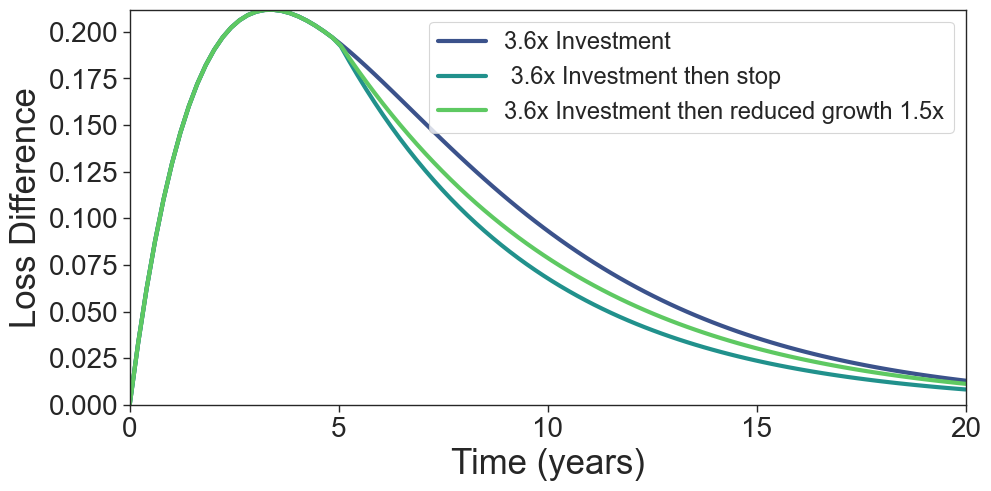

In [26]:
#now look at model trends under each of these investment scenarios
#part of robustness analysis look at different starting captial scenarios
dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop

sns.set_style("ticks")
sns.set_context("paper")
time = np.linspace(0, 20, 100)
colors = sns.color_palette("viridis", n_colors=3)

# Convert investment arrays to numpy arrays for element-wise multiplication
exponential_stop_investment = np.array(exponential_stop_investment)
exponential_reduce_investment = np.array(exponential_reduce_investment)

loss_diff_exponential = -(total_loss(dollar_to_flop*exponential_investment, time) - total_loss(flop_year_zero, time))

loss_diff_exponential_stop = -(total_loss(dollar_to_flop*exponential_stop_investment, time) - total_loss(flop_year_zero, time))

loss_diff_exponential_reduce = -(total_loss(dollar_to_flop*exponential_reduce_investment, time) - total_loss(1000*dollar_to_flop, time))
plt.figure(figsize=(10, 5))
plt.plot(time, loss_diff_exponential, label="3.6x Investment", linewidth=3, color=colors[0])
plt.plot(time, loss_diff_exponential_stop, label=" 3.6x Investment then stop", linewidth=3, color=colors[1])
plt.plot(time, loss_diff_exponential_reduce, label="3.6x Investment then reduced growth 1.5x", linewidth=3, color=colors[2])
plt.legend(fontsize=17)
plt.xlabel("Time (years)", fontsize=25)
plt.ylabel("Loss Difference", fontsize=25)
# plt.grid(True)
plt.xticks(np.arange(0, 21, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time (years)", fontsize=25)
plt.margins(0,0)
plt.tight_layout()
plt.savefig("Figures/variation_investment_curves_loss_diff.png")


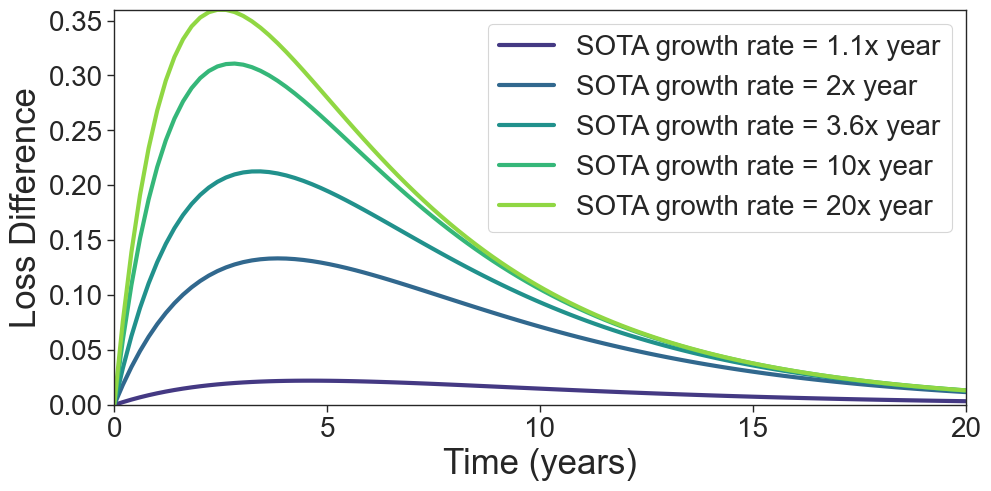

In [27]:
#model configuring various levels of compute growth 
#first look at variation with variation in shared growth factor 
#part of robustness analysis look at different starting captial scenarios
dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop




sns.set_style("ticks")
sns.set_context("paper")
time = np.linspace(0, 20, 100)
plt.figure(figsize=(10,5))
colors = sns.color_palette("viridis", n_colors=5)
for i, sota_compute_growth in enumerate([1.1, 2, 3.6, 10, 20]):
    # both models start with an initial captial of 1000 dollars
    sota_loss = total_loss(start_capital*dollar_to_flop * (sota_compute_growth) ** time, time)
    basic_model_loss = total_loss(start_capital*dollar_to_flop, time)
    plt.plot(
        time, basic_model_loss - sota_loss, label=f"SOTA growth rate = {sota_compute_growth}x year", linewidth=3, color=colors[i])
# add description 
# add description to plot
# plt.title("Variation of Initial Top Model Investment", fontsize=14)
plt.xlabel("Time (years)", fontsize=25)
plt.ylabel("Loss Difference", fontsize=25)
#adjust font sizes
plt.xticks(np.arange(0, 21, 5),fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.margins(0,0)
# plt.setp(plt.gca().spines.values(), color='#CCD8D9')
# plt.grid('major', color='#F2F6F6', zorder=0)
# plt.tick_params(axis='both', which='both', color='#CCD8D9')
plt.tight_layout()
#save image to paper images
plt.savefig("Figures/variation_sota_growth.png")
plt.show()


In [28]:


def compute_Cinf(g_alg, g_h, g_i, g_inf, C0, t=1):
    """
    Positive-root solution for C_inf in
        (g_alg · g_h · g_i)^t · C0
      = (g_h^t · C_inf)^2 · (g_alg · g_inf)^t

    Parameters
    ----------
    g_alg, g_h, g_i, g_inf : float or array_like
        Growth factors (scalars or NumPy-broadcastable arrays).
    C0 : float or array_like
        Reference constant C_0.
    t : int or float, optional
        Exponent t in the model (default 1).

    Returns
    -------
    C_inf : float or ndarray
        The positive-root value that zeros the original expression.
    """
    # promote everything to arrays for clean broadcasting
    g_alg = np.asarray(g_alg, dtype=float)
    g_h   = np.asarray(g_h,   dtype=float)
    g_i   = np.asarray(g_i,   dtype=float)
    g_inf = np.asarray(g_inf, dtype=float)
    C0    = np.asarray(C0,    dtype=float)

    # R = ((g_alg*g_h*g_i)^t * C0) / ((g_alg*g_inf)^t)
    R = (g_alg * g_h * g_i)**t * C0 / (g_alg * g_inf)**t

    if np.any(R < 0):
        raise ValueError("R became negative → no real positive root exists.")

    # g_h^t * C_inf = +sqrt(R)  ⇒  C_inf = sqrt(R) / g_h^t
    return np.sqrt(R) / (g_h**t)


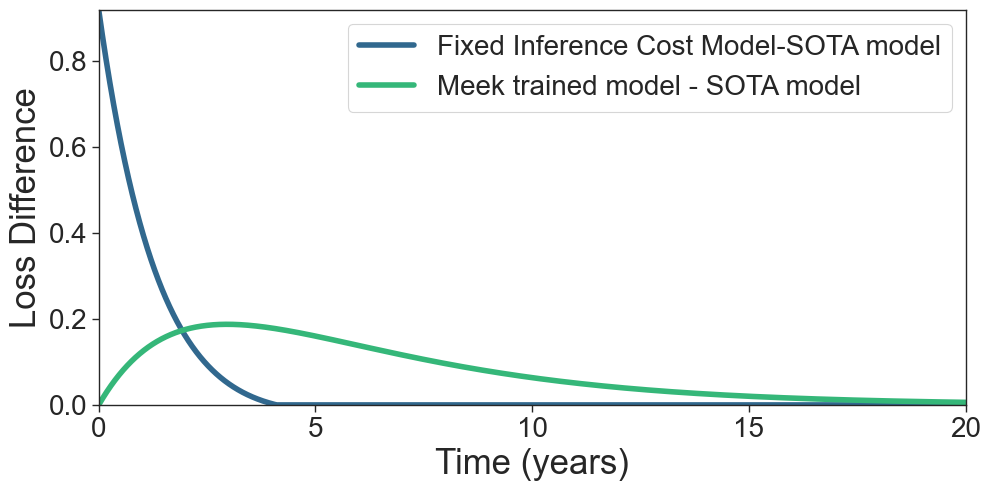

In [29]:
#part of robustness analysis look at different starting captial scenarios
dollar_to_flop = 1e17
alg_gains_train = 3.6 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop

def total_loss_inf(init_compute, time):
    effective_training_compute = init_compute * (hardware_gains**time)*(alg_gains_inf**time)
    effective_inference_compute = effective_training_compute**2 * (alg_gains**time)
    return chin_func(effective_inference_compute)



sns.set_style("ticks")
sns.set_context("paper")
#Model of Inference Inequality Over Time
# base_inference_cost = 0.0000001
# base_inference_cost = .00000001
base_inference_cost = 1e-8
# base_inference_cost = compute_Cinf(g_alg=alg_gains, g_h=hardware_gains, g_i=sota_compute_growth, g_inf=alg_gains_inf, C0=flop_year_zero, t=0)
#this is equal to 1e-8
time = np.linspace(0, 20, 10000)
colors = sns.color_palette("viridis", n_colors=2)
# Plot inference overhang and training overhang at the same time
sota_loss = total_loss(start_capital* dollar_to_flop * (sota_compute_growth) ** time, time)
basic_loss = total_loss(start_capital*dollar_to_flop, time)
# computer inference cost of model that uses 1000 dollars of training
# infcost0 = 

diff_array = np.maximum(total_loss_inf(base_inference_cost*dollar_to_flop, time)-sota_loss, 0)
plt.figure(figsize=(10, 5))
plt.plot(time, diff_array, label="Fixed Inference Cost Model-SOTA model", linewidth=4, color=colors[0])
plt.plot(time, np.maximum(basic_loss-sota_loss, 0), label="Meek trained model - SOTA model", linewidth=4, color=colors[1])
plt.xlabel("Time (years)", fontsize=25)
plt.ylabel("Loss Difference", fontsize=25)
plt.xticks(np.arange(0, 21, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
# plt.title("Inference vs Training Inequality Over Time", fontsize=14)
# plt.grid(True)
plt.margins(0,0)
plt.tight_layout()
plt.savefig("Figures/loss_diff_inference.png")
plt.show()
